In [1]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

In [2]:
data_all = "Output/2019_2020_mixed_beverage"


df_all = pd.read_csv(data_all, encoding="utf-8")


In [3]:
#efficient way to extract year from string format date
df_all['year'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).year
df_all['month'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).month
df_all.head()

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,responsibility_begin_date_yyyymmdd,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month
0,32068897456,"HC&K, LLC",7035 W GRAND PKWY S STE 10,RICHMOND,TX,77407.0,79,1,TOP SUSHI,7035 W GRAND PKWY S STE 10,...,2019-01-16T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,NaN,2019,1
1,32051593963,J & J ACKERMAN CORP.,PO BOX 939,GRANGER,TX,76530.0,246,3,COTTON COUNTRY CLUB,212 E DAVILLA ST,...,2019-01-28T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,NaN,2019,1
2,32046106475,FJ RESTAURANT INC,9300 S INTERSTATE 35 STE 8500 # 431,AUSTIN,TX,78748.0,227,2,TAQUERIA MEXICANO GRILLE,10207 CHINA SPRING RD STE 140,...,2019-06-19T00:00:00.000,2019-01-31T00:00:00.000,10013,0,8648,0,18661,NaN,2019,1
3,32054228120,S & KW CORPORATION,6617 CHIMNEY ROCK RD,HOUSTON,TX,77081.0,101,1,NAZARETH CAFE,6617 CHIMNEY ROCK RD,...,2014-08-01T00:00:00.000,2019-01-31T00:00:00.000,3212,0,2509,0,5721,NaN,2019,1
4,32000861685,"FOUNTAIN FOODS, INC.",25600 WESTHEIMER PKWY STE 110,KATY,TX,77494.0,79,2,HARVEST ORGANIC GRILLE,1810 FOUNTAIN VIEW DR,...,2012-08-21T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-06-01T00:00:00.000,2019,1


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   taxpayer_number                      120000 non-null  int64  
 1   taxpayer_name                        120000 non-null  object 
 2   taxpayer_address                     120000 non-null  object 
 3   taxpayer_city                        120000 non-null  object 
 4   taxpayer_state                       119912 non-null  object 
 5   taxpayer_zip                         119912 non-null  float64
 6   taxpayer_county                      120000 non-null  int64  
 7   location_number                      120000 non-null  int64  
 8   location_name                        120000 non-null  object 
 9   location_address                     120000 non-null  object 
 10  location_city                        120000 non-null  object 
 11  location_stat

In [5]:
city_mask = (df_all.location_city == "HOUSTON")|(df_all.location_city == "DALLAS")|(df_all.location_city == "FORT WORTH")|(df_all.location_city == "SAN ANTONIO")|(df_all.location_city == "AUSTIN")
dfcities = df_all[city_mask]
dfcities.location_city

3             HOUSTON
4             HOUSTON
5              DALLAS
10             AUSTIN
12            HOUSTON
             ...     
119989        HOUSTON
119990    SAN ANTONIO
119994        HOUSTON
119996    SAN ANTONIO
119998        HOUSTON
Name: location_city, Length: 44006, dtype: object

In [6]:
dfcities.head()

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,responsibility_begin_date_yyyymmdd,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month
3,32054228120,S & KW CORPORATION,6617 CHIMNEY ROCK RD,HOUSTON,TX,77081.0,101,1,NAZARETH CAFE,6617 CHIMNEY ROCK RD,...,2014-08-01T00:00:00.000,2019-01-31T00:00:00.000,3212,0,2509,0,5721,NaN,2019,1
4,32000861685,"FOUNTAIN FOODS, INC.",25600 WESTHEIMER PKWY STE 110,KATY,TX,77494.0,79,2,HARVEST ORGANIC GRILLE,1810 FOUNTAIN VIEW DR,...,2012-08-21T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-06-01T00:00:00.000,2019,1
5,17526234541,"THE KING LOUNGE, INC.",3684 ASBURY ST,DALLAS,TX,75205.0,57,1,THE KING LOUNGE INC,1602 MARKET CENTER BLVD,...,1996-02-15T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-01-16T00:00:00.000,2019,1
10,32061761998,WICKED WINGS LLC,615 W SLAUGHTER LN STE 108,AUSTIN,TX,78748.0,227,2,BUCKET'S BACKYARD BAR AND GRILL,9900 S INTERSTATE 35 BLDG M STE 200,...,2017-03-17T00:00:00.000,2019-01-31T00:00:00.000,8777,215,15076,0,24068,2019-09-09T00:00:00.000,2019,1
12,32059688088,"RICHMOND MIA BELLA, LLC",19 MAYMONT WAY,SPRING,TX,77382.0,170,1,MIA BELLA TRATTORIA,3773 RICHMOND AVE STE 1A,...,2017-05-09T00:00:00.000,2019-01-31T00:00:00.000,12965,25073,2298,0,40336,2019-06-13T00:00:00.000,2019,1


In [7]:
column_name = "liquor_receipts"
column_sum = dfcities[column_name].sum()
print(column_sum)

1065838721


In [8]:
column_name = "wine_receipts"
column_sum = dfcities[column_name].sum()
print(column_sum)

344531277


In [9]:
column_name = "beer_receipts"
column_sum = dfcities[column_name].sum()
print(column_sum)

485122162


In [10]:
all = [1065838721, 344531277, 485122162]
sum(all)
# 1895492160

1895492160

In [11]:
mask = dfcities.year == 2019
first_df = dfcities.loc[mask].reset_index(drop=True)

first_df.head()

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,responsibility_begin_date_yyyymmdd,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month
0,32054228120,S & KW CORPORATION,6617 CHIMNEY ROCK RD,HOUSTON,TX,77081.0,101,1,NAZARETH CAFE,6617 CHIMNEY ROCK RD,...,2014-08-01T00:00:00.000,2019-01-31T00:00:00.000,3212,0,2509,0,5721,NaN,2019,1
1,32000861685,"FOUNTAIN FOODS, INC.",25600 WESTHEIMER PKWY STE 110,KATY,TX,77494.0,79,2,HARVEST ORGANIC GRILLE,1810 FOUNTAIN VIEW DR,...,2012-08-21T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-06-01T00:00:00.000,2019,1
2,17526234541,"THE KING LOUNGE, INC.",3684 ASBURY ST,DALLAS,TX,75205.0,57,1,THE KING LOUNGE INC,1602 MARKET CENTER BLVD,...,1996-02-15T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-01-16T00:00:00.000,2019,1
3,32061761998,WICKED WINGS LLC,615 W SLAUGHTER LN STE 108,AUSTIN,TX,78748.0,227,2,BUCKET'S BACKYARD BAR AND GRILL,9900 S INTERSTATE 35 BLDG M STE 200,...,2017-03-17T00:00:00.000,2019-01-31T00:00:00.000,8777,215,15076,0,24068,2019-09-09T00:00:00.000,2019,1
4,32059688088,"RICHMOND MIA BELLA, LLC",19 MAYMONT WAY,SPRING,TX,77382.0,170,1,MIA BELLA TRATTORIA,3773 RICHMOND AVE STE 1A,...,2017-05-09T00:00:00.000,2019-01-31T00:00:00.000,12965,25073,2298,0,40336,2019-06-13T00:00:00.000,2019,1


In [12]:
column_name = "liquor_receipts"
column_sum = first_df[column_name].sum()
print(column_sum)

691592576


In [13]:
column_name = "wine_receipts"
column_sum = first_df[column_name].sum()
print(column_sum)

231605900


In [14]:
column_name = "beer_receipts"
column_sum = first_df[column_name].sum()
print(column_sum)

333090036


In [15]:
first2019 = [691592576, 231605900, 333090036]
sum(first2019)
# 1256288512

1256288512

In [16]:
mask = dfcities.year == 2020
second_df = dfcities.loc[mask].reset_index(drop=True)

second_df.head()

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,responsibility_begin_date_yyyymmdd,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month
0,32011300103,"ABC RESOURCES, LLC",PO BOX 50550,AUSTIN,TX,78763.0,227,1,ABEL'S ON THE LAKE,3825 LAKE AUSTIN BLVD STE 201,...,2009-05-21T00:00:00.000,2020-01-31T00:00:00.000,24739,5859,11919,0,42517,NaN,2020,1
1,32063084811,WLC GROUP LLC,3206 PATRICIA LN,PEARLAND,TX,77581.0,20,1,HIGH & DRY,306 MAIN ST STE 200,...,2017-07-27T00:00:00.000,2020-01-31T00:00:00.000,58065,1737,6890,0,66692,NaN,2020,1
2,32057413588,WILLIE'S GRILL & ICEHOUSE LLC,10627 TOWER OAKS BLVD,HOUSTON,TX,77070.0,101,19,WILLIE'S GRILL & ICEHOUSE,7911 INTERSTATE 35 S,...,2017-05-03T00:00:00.000,2020-01-31T00:00:00.000,12734,120,15489,0,28343,NaN,2020,1
3,17523234122,NEMA BEVERAGE CORPORATION,1201 ELM ST STE 2700 ATTN:TAX DEPT,DALLAS,TX,75270.0,57,13,NM CAFE,5200 MONAHANS AVE,...,2017-03-01T00:00:00.000,2020-01-31T00:00:00.000,1405,4411,76,0,5892,NaN,2020,1
4,12612491956,"D & R BAR, INC.",21735 RUGGED HLS,SAN ANTONIO,TX,78258.0,15,1,THREE LEGGED MONKEY,2313 NW MILITARY HWY,...,2008-01-15T00:00:00.000,2020-01-31T00:00:00.000,27723,41,12589,0,40353,NaN,2020,1


In [17]:
column_name = "liquor_receipts"
column_sum = second_df[column_name].sum()
print(column_sum)

374246145


In [18]:
column_name = "wine_receipts"
column_sum = second_df[column_name].sum()
print(column_sum)

112925377


In [19]:
column_name = "beer_receipts"
column_sum = second_df[column_name].sum()
print(column_sum)

152032126


In [20]:
second2020 = [374246145, 112925377, 152032126]
sum(second2020)
# 639203648

639203648

In [21]:
all = [1256288512, 639203648]
sum(all)

1895492160

In [44]:
Year=['2019', '2020',]
amount=[1256288512,639203648]

In [45]:
xpos = np.arange(len(Year))
xpos

array([0, 1])

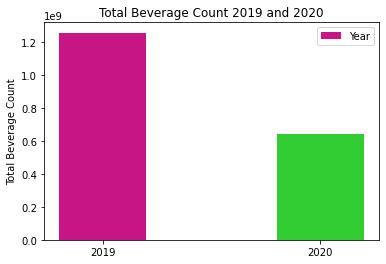

In [47]:
plt.xticks(xpos,Year)
plt.ylabel("Total Beverage Count")
plt.title("Total Beverage Count 2019 and 2020")
c1 = ['mediumvioletred', 'limegreen']

plt.bar(xpos , amount, width=0.4 , color = c1 , label="Year")
plt.legend()

In [33]:
Beverage_Type=['Year_2019', 'Year_2020', 'total_amount']
liquor =[691592576,374246145,1065838721]
wine =[231605900,112925377,344531277]
beer =[333090036,152032126,485122162]

In [34]:
xpos = np.arange(len(Beverage_Type))
xpos

array([0, 1, 2])

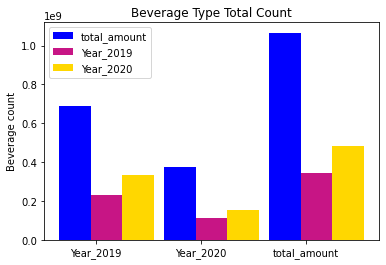

In [41]:
plt.xticks(xpos,Beverage_Type)
plt.ylabel("Beverage count")
plt.title("Beverage Type Total Count")
c1 = ['blue', 'blue', 'blue']
c2 = ['mediumvioletred', 'mediumvioletred', 'mediumvioletred']
c3 = ['gold', 'gold', 'gold']

plt.bar(xpos-0.2,liquor, width=0.3 , color = c1 , label="total_amount") 
plt.bar(xpos+0.1,wine, width=0.3 , color = c2, label="Year_2019")
plt.bar(xpos+0.4,beer, width=0.3 , color = c3, label="Year_2020")
plt.legend()